In [1]:
from pathlib import Path
import os

# Establece la raíz del proyecto manualmente
project_root = Path("F:/JCMDataCenter/Cursos/Evolve Academy/Data Scientist IA/Futpeak") # sobremesa
#project_root = Path("C:/Users/juanm/Desktop/FUTPEAK/Futpeak") # portátil

# Cambia el directorio de trabajo actual a esa raíz
os.chdir(project_root)

print("📁 Directorio de trabajo actual:", Path.cwd())

📁 Directorio de trabajo actual: F:\JCMDataCenter\Cursos\Evolve Academy\Data Scientist IA\Futpeak


In [2]:
# FUTPEAK — MVP Notebook para Predicción de Evolución de Jugadores
# Etapa 1: Carga y revisión inicial de los datos

# ----------------------------------------------
# 👨‍🏫 Introducción:
# En esta primera etapa vamos a cargar los datos y entender qué columnas tenemos,
# cuál es su estructura y cómo nos pueden servir para modelar la evolución de un jugador.
# ----------------------------------------------

import pandas as pd
from pathlib import Path

# Ruta del proyecto (ajusta si estás en otro equipo)
project_root = Path("data/processed")

# Cargar los dos datasets principales
matchlogs_path = project_root / "cleaned_matchlogs.csv"
metadata_path = project_root / "cleaned_metadata.csv"

# Leemos los CSV
matchlogs = pd.read_csv(matchlogs_path)
metadata = pd.read_csv(metadata_path)

# ----------------------------------------------
# 🔍 Revisión rápida de las estructuras
# ----------------------------------------------

print("\n📄 Matchlogs (por partido):")
print(matchlogs.shape)
print(matchlogs.columns.tolist())
print(matchlogs.head(2))

print("\n👤 Metadata (por jugador):")
print(metadata.shape)
print(metadata.columns.tolist())
print(metadata.head(2))

# ----------------------------------------------
# 📌 Qué queremos revisar en esta etapa:
# - ¿Qué columnas son numéricas y están completas?
# - ¿Cómo se codifican las posiciones?
# - ¿Hay duplicados o errores evidentes?
# - ¿Podemos unir ambos datasets por Player_ID sin problema?
# ----------------------------------------------

# Verificar si hay duplicados
print("\n🔎 Duplicados en Player_ID:", metadata['Player_ID'].duplicated().sum())

# Revisar columnas clave con nulos en matchlogs
print("\n🧼 Nulos por columna (matchlogs):")
print(matchlogs.isnull().sum().sort_values(ascending=False))

# Revisar columnas clave con nulos en metadata
print("\n🧼 Nulos por columna (metadata):")
print(metadata.isnull().sum().sort_values(ascending=False))

# ----------------------------------------------
# ✅ Resultado esperado de esta etapa:
# - Confirmar que los archivos se cargan bien
# - Saber qué columnas numéricas están listas para usar (goles, asistencias, minutos, etc.)
# - Detectar columnas que necesitamos rellenar con 0 (como goles, tarjetas, tiros...)
# - Tener claro que podemos unir los datos sin conflicto
# ----------------------------------------------


📄 Matchlogs (por partido):
(688871, 46)
['Player_name', 'Player_ID', 'Seasons', 'Date', 'Day', 'Competition', 'Round', 'Home_Away', 'Result', 'Player_team', 'Rival_team', 'Start', 'Position', 'Minutes', 'Goals', 'Assists', 'Penalty_kick', 'Penalty_kick_att', 'Shots', 'Shots_on_target', 'Yellow_cards', 'Red_cards', 'Fouls_committed', 'Fouls_drawn', 'Offsides', 'Crosses', 'Tackles_won', 'Interceptions', 'Own_goals', 'Penaltys_won', 'Penaltys_conceded', 'Touches', 'Tackles', 'Blocks', 'xG', 'non_penalty_xG', 'x_assisted_G', 'Shot_creating_actions', 'Goal_creating_actions', 'Passes_completed', 'Passes_att', 'Percent_passes', 'Progressive_passes', 'Feet_control', 'Progressive_control', 'Dribling_suc']
        Player_name Player_ID Seasons        Date  Day  Competition  \
0  Luciano Abecasis  6c510f2d    2016  2016-02-05  Fri  Primera Div   
1  Luciano Abecasis  6c510f2d    2016  2016-02-12  Fri  Primera Div   

         Round Home_Away Result Player_team  ... x_assisted_G  \
0  Matchweek 1

In [3]:
# Conocer número total de jugadores 
total_unique_players = matchlogs['Player_ID'].nunique()
print("Total number of unique players:", total_unique_players)


Total number of unique players: 5210


In [4]:
import re

# Usamos límites de palabra (\b) o delimitadores de posición como - o inicio/final
pattern = r'(^|[-])(?:CF|ST|FW|LW|RW|WF|IF|F)($|[-])'

df_attack = metadata['Position'].str.contains(pattern, na=False)
df_attack.sum()


metadata[df_attack]



C:\Users\juanm\AppData\Local\Temp\ipykernel_19640\2833990896.py:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_attack = metadata['Position'].str.contains(pattern, na=False)


,Player_ID,Player_name,Full_name,Url_template,Birth_date,Age,Position,Footed,Birth_place,Nationality,Club,First_name,Gender
1,db5ee72d,Ramon Abila,Ramón Darío Ábila,https://fbref.com/en/players/db5ee72d/Ramon-Abila,1989-10-14,35-198,FW,Right,"Córdoba, Argentina",Argentina,Huracán,Ramon,male
6,363ba6d7,Luciano Acosta,Luciano Federico Acosta,https://fbref.com/en/players/363ba6d7/Luciano-...,1994-05-31,30-334,AM-FC-FW-MF,Right,"Rosario, Argentina",Argentina,FC Dallas,Luciano,male
8,15741f49,Walter Acuna,NaN,https://fbref.com/en/players/15741f49/Walter-A...,1992-03-04,NaN,FW,NaN,NaN,Argentina,NaN,Walter,male
14,d9ebfcfa,Gabriel Alanis,NaN,https://fbref.com/en/players/d9ebfcfa/Gabriel-...,1994-03-16,31-045,AM-DF-FW-MF-WM,Left,"Córdoba, Argentina",Argentina,Huracán,Gabriel,male
16,834d0be5,Lucas Alario,Lucas Nicolás Alario,https://fbref.com/en/players/834d0be5/Lucas-Al...,1992-10-08,32-204,FW-LP,Right,"Tostado, Argentina",Argentina,Estudiantes (LP),Lucas,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12478,727e7bf1,Dior Angus,NaN,https://fbref.com/en/players/727e7bf1/Dior-Angus,NaN,NaN,FW-MF,NaN,NaN,England,NaN,Dior,unknown
12479,6f4a2915,Joe Anyinsah,Joseph Greene Anyinsah,https://fbref.com/en/players/6f4a2915/Joe-Anyi...,NaN,NaN,FW,NaN,NaN,England,NaN,Joe,male
12482,68c720b5,Adam Armstrong,Adam James Armstrong,https://fbref.com/en/players/68c720b5/Adam-Arm...,1997-02-10,28-096,AM-FW-MF,Right,"Newcastle upon Tyne, England, United Kingdom",England,West Bromwich Albion,Adam,male
12485,4966b48d,Nathan Arnold,Nathan Anthony Arnold,https://fbref.com/en/players/4966b48d/Nathan-A...,NaN,NaN,AM-FW-MF-WM,NaN,NaN,England,NaN,Nathan,male


In [5]:
# ----------------------------------------------
# Etapa 2: Unión, cálculo de edad y filtrado por perfil ofensivo (con regex personalizado)
# ----------------------------------------------

import pandas as pd
import re

# Definir los grupos de posiciones (puede seguir siendo útil para otras tareas)
POSITION_GROUPS = {
    'GOALKEEPER': ['GK'],
    'DEFENSIVE': ['CB', 'LB', 'RB', 'FB', 'LWB', 'RWB', 'SW', 'D'],
    'MIDFIELD': ['CM', 'DM', 'MF', 'AM'],
    'ATTACKING': ['CF', 'ST', 'F', 'FW', 'LW', 'RW', 'WF', 'IF', 'OL', 'OR']
}

# ----------------------------------------------
# 1. Detectar jugadores atacantes mediante regex sobre metadata
# ----------------------------------------------
pattern = r'(^|-)(?:CF|ST|FW|LW|RW|WF|IF|F|OL|OR)($|-)'
df_attack_mask = metadata['Position'].str.contains(pattern, na=False, regex=True)
df_attack = metadata[df_attack_mask].copy()

# Solo jugadores masculinos
df_attack = df_attack[df_attack['Gender'] == 'male']

# Asignamos grupo de posición (opcional, útil para ver distribución)
def assign_position_group(position):
    for group, positions in POSITION_GROUPS.items():
        if any(pos in position for pos in positions):
            return group
    return 'UNKNOWN'

df_attack['Position_Group'] = df_attack['Position'].apply(assign_position_group)

# Verificación
print(f"\n✅ Jugadores ofensivos detectados por regex: {df_attack['Player_ID'].nunique()}")

# ----------------------------------------------
# 2. Unir matchlogs con metadata filtrada (solo atacantes)
# ----------------------------------------------
df = matchlogs.merge(
    df_attack[['Player_ID', 'Position', 'Birth_date', 'Position_Group']],
    on='Player_ID', how='inner'  # Solo jugadores ofensivos
)

print(f"🧠 Total de filas (partidos) de jugadores ofensivos: {df.shape[0]}")
print(f"🧠 Jugadores ofensivos únicos en df final: {df['Player_ID'].nunique()}")

# ----------------------------------------------
# Después del merge, aseguramos que 'Position' sea la correcta
# Si aparecen Position_x y Position_y, nos quedamos con la del metadata (Position_y)
if 'Position_x' in df.columns and 'Position_y' in df.columns:
    df['Position'] = df['Position_y']
    df = df.drop(columns=['Position_x', 'Position_y'])  # limpiamos duplicadas


# ----------------------------------------------
# 3. Cálculo de edad en cada partido
# ----------------------------------------------
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Birth_date'] = pd.to_datetime(df['Birth_date'], errors='coerce')

df['Age'] = (df['Date'] - df['Birth_date']).dt.days / 365.25

# Verificamos algunos valores
print("\n🧾 Ejemplo de fechas y edad calculada:")
print(df[['Player_ID', 'Date', 'Birth_date', 'Age']].head())

# ----------------------------------------------
# 4. Nulos por columna y su porcentaje
# ----------------------------------------------
nulls = df.isnull().sum()
null_pct = (nulls / len(df)) * 100
null_info = pd.DataFrame({'Nulls': nulls, 'Percentage': null_pct})
print("\n🔎 Nulos por columna (top 10):")
print(null_info[null_info['Nulls'] > 0].sort_values(by='Percentage', ascending=False).head(10))

# ----------------------------------------------
# ✅ Resultado esperado:
# - Solo se han incluido los jugadores ofensivos definidos por tu patrón regex
# - Se ha unido correctamente con matchlogs
# - Edad por partido está calculada
# - Se revisan columnas con nulos para decidir qué usar en fórmula de rating
# ----------------------------------------------



✅ Jugadores ofensivos detectados por regex: 2936
🧠 Total de filas (partidos) de jugadores ofensivos: 200581
🧠 Jugadores ofensivos únicos en df final: 1350


C:\Users\juanm\AppData\Local\Temp\ipykernel_19640\1490155568.py:20: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_attack_mask = metadata['Position'].str.contains(pattern, na=False, regex=True)



🧾 Ejemplo de fechas y edad calculada:
  Player_ID       Date Birth_date        Age
0  db5ee72d 2024-02-11 1989-10-14  34.327173
1  db5ee72d 2024-02-11 1989-10-14  34.327173
2  db5ee72d 2024-02-14 1989-10-14  34.335387
3  db5ee72d 2024-02-14 1989-10-14  34.335387
4  db5ee72d 2024-02-24 1989-10-14  34.362765

🔎 Nulos por columna (top 10):
                        Nulls  Percentage
Penaltys_conceded      173849   86.672716
Penaltys_won           173849   86.672716
Tackles_won            139737   69.666120
Crosses                139736   69.665621
Fouls_drawn            139736   69.665621
Fouls_committed        139736   69.665621
Offsides               139735   69.665123
Percent_passes         131996   65.806831
Touches                131268   65.443886
Shot_creating_actions  131268   65.443886


In [6]:
# Qué atacantes no tienen registros en matchlogs
missing_ids = set(df_attack['Player_ID']) - set(df['Player_ID'])
print(f"🔍 Jugadores ofensivos que no entraron al merge: {len(missing_ids)}")

# ¿Y cuántos tienen partidos en matchlogs?
missing_in_logs = matchlogs[matchlogs['Player_ID'].isin(missing_ids)]
print(f"📊 Jugadores con datos en matchlogs aunque no quedaron en df: {missing_in_logs['Player_ID'].nunique()}")


🔍 Jugadores ofensivos que no entraron al merge: 1586
📊 Jugadores con datos en matchlogs aunque no quedaron en df: 0


In [7]:
# Número total de jugadores del df
df['Player_ID'].unique()
# Número total de jugadores del df
len(df['Player_ID'].unique())



1350

In [8]:
unique_players = df[['Player_ID', 'Player_name']].drop_duplicates().sort_values('Player_name')
print(unique_players.to_string(index=False))


Player_ID                     Player_name
 14c2e443                    Aaron Nemane
 1fd66907                  Abdoul Diawara
 1757d7bb                      Abel Balbo
 8dfed6e9                    Adolfo Gaich
 86bc2c16                  Adrian Dabasse
 4ec73d8a                         Adriano
 7330f886                   Adrián Dalmau
 68b35520                Adrián Fernández
 48ad8e8f                     Adrián León
 098a28f8                  Agustin Hausch
 b5a3e7fe                Agustín Auzmendi
 9a864054                Agustín Balbuena
 a98f4de5                  Agustín Bouzat
 cc00dedf               Agustín Cacabelos
 89fd5410                  Agustín Colazo
 06424feb                  Agustín Coscia
 6abc87e1              Agustín Curruhinca
 0cb368a6                    Agustín Díaz
 deb75bd4                 Agustín Fontana
 8ac63e52                   Agustín Gallo
 e516a74d               Agustín Giaquinto
 1030ba06            Agustín Gil Clarotti
 3867759b          Agustín Gonzále

In [9]:
print("Columnas en df:", df.columns.tolist())


Columnas en df: ['Player_name', 'Player_ID', 'Seasons', 'Date', 'Day', 'Competition', 'Round', 'Home_Away', 'Result', 'Player_team', 'Rival_team', 'Start', 'Minutes', 'Goals', 'Assists', 'Penalty_kick', 'Penalty_kick_att', 'Shots', 'Shots_on_target', 'Yellow_cards', 'Red_cards', 'Fouls_committed', 'Fouls_drawn', 'Offsides', 'Crosses', 'Tackles_won', 'Interceptions', 'Own_goals', 'Penaltys_won', 'Penaltys_conceded', 'Touches', 'Tackles', 'Blocks', 'xG', 'non_penalty_xG', 'x_assisted_G', 'Shot_creating_actions', 'Goal_creating_actions', 'Passes_completed', 'Passes_att', 'Percent_passes', 'Progressive_passes', 'Feet_control', 'Progressive_control', 'Dribling_suc', 'Birth_date', 'Position_Group', 'Position', 'Age']


In [10]:
# ----------------------------------------------
# Etapa 3: Cálculo del rating ofensivo por partido y agregación por temporada
# ----------------------------------------------

# Variables necesarias
rating_vars = ['Goals', 'Assists', 'Shots', 'Shots_on_target', 'Yellow_cards', 'Red_cards', 'Minutes']

# Rellenar nulos con 0 (solo esas columnas)
df[rating_vars] = df[rating_vars].fillna(0)

# Función de rating por partido normalizado a 90 minutos
def calculate_rating(row):
    score = (
        row['Goals'] * 5 +
        row['Assists'] * 4 +
        row['Shots_on_target'] * 0.5 +
        (row['Shots'] - row['Shots_on_target']) * 0.1 -
        row['Yellow_cards'] * 1 -
        row['Red_cards'] * 2
    )
    return score / (row['Minutes'] / 90) if row['Minutes'] > 0 else 0

# Aplicar cálculo
df['rating_per_90'] = df.apply(calculate_rating, axis=1)

# Verificar ejemplo de ratings calculados
print("\n📊 Ejemplo de ratings por partido:")
print(df[['Player_ID', 'Date', 'Minutes', 'Goals', 'Assists', 'rating_per_90']].head())

# ----------------------------------------------
# Agregar rating por temporada (año natural)
# ----------------------------------------------
df['Calendar_year'] = df['Date'].dt.year  # Puedes ajustar esto si tienes otro criterio de temporada

df_season = df.groupby(['Player_ID', 'Calendar_year']).agg({
    'Minutes': 'sum',
    'Goals': 'sum',
    'Assists': 'sum',
    'rating_per_90': 'mean',
    'Age': 'mean'
}).reset_index()

# Verificación de resultados agregados
print("\n📈 Evolución anual ejemplo:")
print(df_season[df_season['Player_ID'] == df_season['Player_ID'].iloc[0]])

# ----------------------------------------------
# ✅ Resultado esperado:
# - Columna `rating_per_90` por partido calculada
# - Evolución del jugador por temporada agregada en `df_season`
# ----------------------------------------------



📊 Ejemplo de ratings por partido:
  Player_ID       Date  Minutes  Goals  Assists  rating_per_90
0  db5ee72d 2024-02-11     34.0    0.0      0.0       0.529412
1  db5ee72d 2024-02-11     34.0    0.0      0.0       0.529412
2  db5ee72d 2024-02-14     30.0    0.0      0.0       0.000000
3  db5ee72d 2024-02-14     30.0    0.0      0.0       0.000000
4  db5ee72d 2024-02-24     24.0    0.0      0.0       0.000000

📈 Evolución anual ejemplo:
  Player_ID  Calendar_year  Minutes  Goals  Assists  rating_per_90        Age
0  0061247c           1999    503.0    0.0      0.0      -0.424862  22.092402
1  0061247c           2000    146.0    0.0      0.0      -0.441176  23.620123



📊 Evolución por temporada del jugador b19db005:
      Calendar_year  Minutes  Goals  Assists  rating_per_90        Age
6819           2015    395.0    2.0      2.0       4.805404  18.550308
6820           2016   3307.0   15.0     14.0       4.225413  19.174300
6821           2017   2207.0    6.0     12.0       3.353573  19.925082
6822           2018   2952.0   15.0     11.0       3.927845  21.153466
6823           2019   1538.0    5.0      3.0       4.370150  22.000614
6824           2020    625.0    5.0      2.0       5.577864  23.488233
6825           2021   2707.0    8.0      5.0       2.351857  23.962461
6826           2022   3262.0    7.0     20.0       3.789117  25.165756
6827           2023   2516.0    5.0      7.0       2.566020  26.210314
6828           2024   3589.0   14.0     13.0       3.731315  27.138817
6829           2025   1903.0   26.0      6.0       9.515772  27.812262


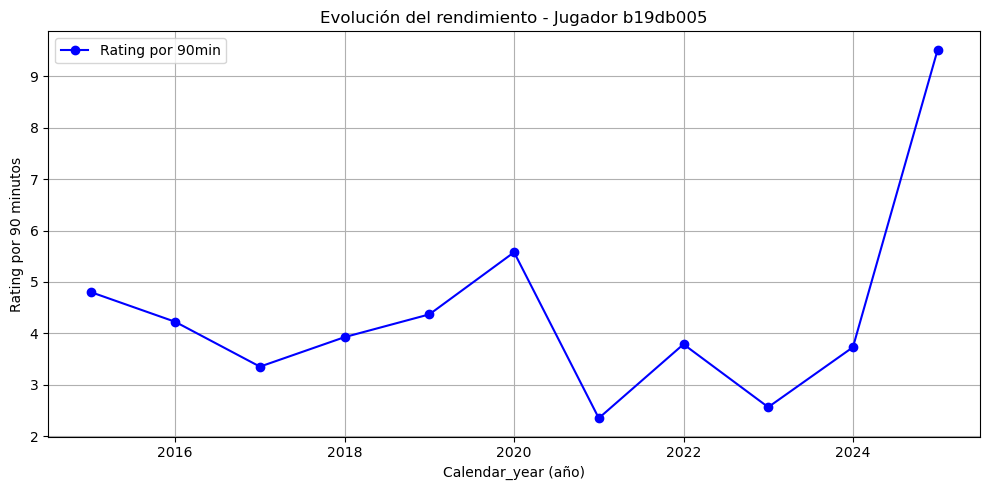

In [11]:
# ----------------------------------------------
# Etapa 3 (visual extra): Tabla y gráfica de evolución de un jugador: Ousmane Dembelé
# ----------------------------------------------

import matplotlib.pyplot as plt

# Seleccionamos directamente el jugador deseado
player_id = 'b19db005'

# Filtramos su información por temporada
player_data = df_season[df_season['Player_ID'] == player_id].sort_values('Calendar_year')

# Mostramos la tabla con su evolución
print(f"\n📊 Evolución por temporada del jugador {player_id}:")
print(player_data[['Calendar_year', 'Minutes', 'Goals', 'Assists', 'rating_per_90', 'Age']])

# Gráfica de evolución del rating
plt.figure(figsize=(10, 5))
plt.plot(player_data['Calendar_year'], player_data['rating_per_90'], marker='o', linestyle='-', color='blue', label='Rating por 90min')
plt.title(f"Evolución del rendimiento - Jugador {player_id}")
plt.xlabel("Calendar_year (año)")
plt.ylabel("Rating por 90 minutos")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



In [12]:
# ----------------------------------------------
# Etapa 4: Detección del año pico y clasificación del tipo de carrera
# ----------------------------------------------

# 1. Detectamos el año con mayor rating por jugador
peak_info = (
    df_season.sort_values(['Player_ID', 'rating_per_90'], ascending=[True, False])
    .groupby('Player_ID')
    .first()
    .reset_index()
    .rename(columns={
        'Calendar_year': 'peak_year',
        'rating_per_90': 'peak_rating',
        'Age': 'age_at_peak'
    })
)

# 2. Unimos esta información al df_season (para cada fila anual del jugador)
df_season = df_season.merge(
    peak_info[['Player_ID', 'peak_year', 'peak_rating', 'age_at_peak']],
    on='Player_ID', how='left'
)

# 3. Clasificamos el tipo de carrera según la edad en el año del pico
def assign_peak_group(age):
    if age <= 23:
        return 'joven estrella'
    elif age <= 28:
        return 'jugador medio'
    else:
        return 'estrellato tardío'

df_season['peak_group'] = df_season['age_at_peak'].apply(assign_peak_group)

# 4. Verificación individual
print("\n📌 Ejemplo de jugadores con su año de pico y tipo de carrera:")
print(df_season[['Player_ID', 'Calendar_year', 'rating_per_90', 'peak_year', 'peak_rating', 'age_at_peak', 'peak_group']].head(10))

# 5. Resumen por grupo
print("\n📊 Distribución de tipos de carrera:")
print(df_season[['Player_ID', 'peak_group']].drop_duplicates()['peak_group'].value_counts())

# ----------------------------------------------
# ✅ Resultado esperado:
# - Cada jugador tiene su peak_year, peak_rating, y peak_group definidos
# - La información se mantiene en df_season, línea por año natural
# - Listo para generar curvas promedio por tipo de carrera (etapa 5)
# ----------------------------------------------



📌 Ejemplo de jugadores con su año de pico y tipo de carrera:
  Player_ID  Calendar_year  rating_per_90  peak_year  peak_rating  \
0  0061247c           1999      -0.424862       1999    -0.424862   
1  0061247c           2000      -0.441176       1999    -0.424862   
2  0085841a           2022       0.799376       2023     3.894406   
3  0085841a           2023       3.894406       2023     3.894406   
4  0085841a           2024       0.564313       2023     3.894406   
5  0085841a           2025      -0.285504       2023     3.894406   
6  00f0e85a           1966       5.000000       1966     5.000000   
7  0118dd71           2015       0.000000       2023     0.062500   
8  0118dd71           2016      -0.333333       2023     0.062500   
9  0118dd71           2017      -0.071429       2023     0.062500   

   age_at_peak         peak_group  
0    22.092402     joven estrella  
1    22.092402     joven estrella  
2    21.341351     joven estrella  
3    21.341351     joven estrella 


📊 Curvas promedio por grupo:
          peak_group  year_since_debut  rating_per_90
0  estrellato tardío                 1       0.912871
1  estrellato tardío                 2       1.343368
2  estrellato tardío                 3       1.623827
3  estrellato tardío                 4       1.873032
4  estrellato tardío                 5       1.980625
5  estrellato tardío                 6       2.418521
6  estrellato tardío                 7       2.200525
7  estrellato tardío                 8       2.228165
8  estrellato tardío                 9       2.487056
9  estrellato tardío                10       2.652116


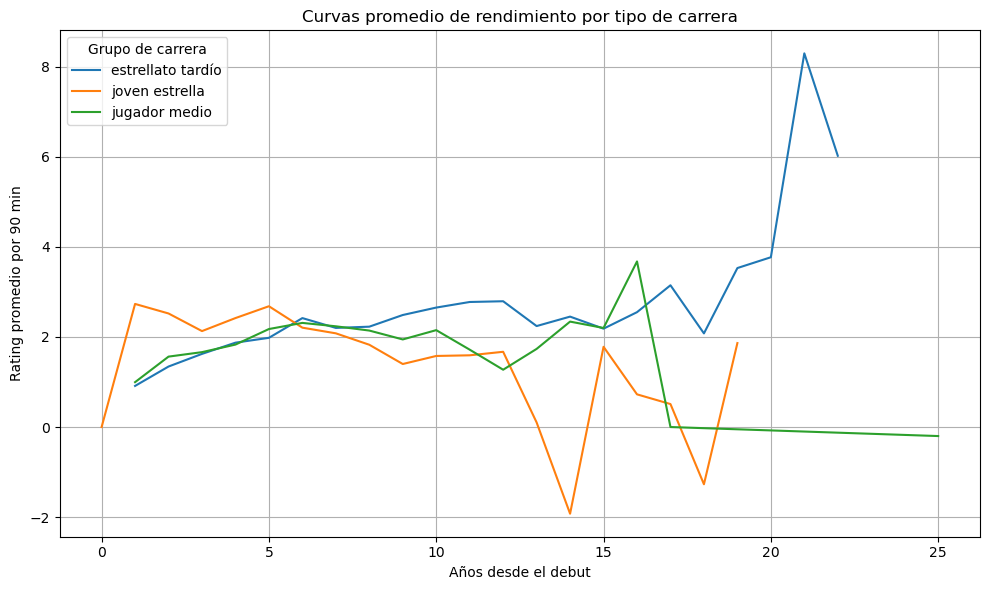

In [13]:
# ----------------------------------------------
# Etapa 5: Curvas promedio por tipo de carrera
# ----------------------------------------------

import matplotlib.pyplot as plt

# Asegúrate de que career_df y df_season están disponibles
# Aquí usamos 'career_df' porque contiene 'year_since_debut'
# Y unimos la info de 'peak_group' desde df_season

# ----------------------------------------------
# Recreamos career_df (trayectoria por año desde el debut)
# ----------------------------------------------

# Si no lo has calculado aún:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
debut_dates = df[df['Minutes'] > 0].groupby('Player_ID')['Date'].min()
df['debut_year'] = df['Player_ID'].map(debut_dates).dt.year
df['year_since_debut'] = df['Date'].dt.year - df['debut_year'] + 1
df['age'] = (df['Date'] - df['Birth_date']).dt.days / 365.25
df['age_year_1'] = df.groupby('Player_ID')['age'].transform('first')

# Ahora sí, agregamos por año relativo (trayectoria)
career_df = df.groupby(['Player_ID', 'year_since_debut']).agg({
    'Minutes': 'sum',
    'Goals': 'sum',
    'Assists': 'sum',
    'rating_per_90': 'mean',
    'age_year_1': 'first'
}).reset_index()

# Extraer solo una fila por jugador con su peak_group
peak_groups = df_season[['Player_ID', 'peak_group']].drop_duplicates()

# Unimos esto a career_df (por year_since_debut)
career_df = career_df.merge(peak_groups, on='Player_ID', how='left')

# Agrupamos por grupo y año desde el debut
curves = career_df.groupby(['peak_group', 'year_since_debut'])['rating_per_90'].mean().reset_index()

# Verificamos cuántos jugadores hay en cada curva
print("\n📊 Curvas promedio por grupo:")
print(curves.head(10))

# ----------------------------------------------
# Visualización
# ----------------------------------------------
plt.figure(figsize=(10, 6))

for group in curves['peak_group'].unique():
    group_data = curves[curves['peak_group'] == group]
    plt.plot(group_data['year_since_debut'], group_data['rating_per_90'], label=group)

plt.title("Curvas promedio de rendimiento por tipo de carrera")
plt.xlabel("Años desde el debut")
plt.ylabel("Rating promedio por 90 min")
plt.grid(True)
plt.legend(title="Grupo de carrera")
plt.tight_layout()
plt.show()


In [14]:
# ----------------------------------------------
# Etapa 6: Preparación del dataset de modelado (usando los primeros 3 años desde el debut)
# ----------------------------------------------

# 1. Tomamos solo los primeros 3 años de carrera
early_years = career_df[career_df['year_since_debut'] <= 3]

# 2. Pivotamos para convertir años en columnas (rating, edad y minutos)
pivot_rating = early_years.pivot(index='Player_ID', columns='year_since_debut', values='rating_per_90')
pivot_age = early_years.pivot(index='Player_ID', columns='year_since_debut', values='age_year_1')
pivot_minutes = early_years.pivot(index='Player_ID', columns='year_since_debut', values='Minutes')

# 3. Renombramos las columnas para claridad
pivot_rating.columns = [f'rating_year_{i}' for i in pivot_rating.columns]
pivot_age.columns = [f'age_year_{i}' for i in pivot_age.columns]
pivot_minutes.columns = [f'minutes_year_{i}' for i in pivot_minutes.columns]

# 4. Combinamos todo en un solo DataFrame
df_model = pd.concat([pivot_rating, pivot_age, pivot_minutes], axis=1)

# 5. Calculamos variables derivadas (solo con años disponibles)
if 'rating_year_2' in df_model.columns and 'rating_year_1' in df_model.columns:
    df_model['growth_2_1'] = df_model['rating_year_2'] - df_model['rating_year_1']
if 'rating_year_3' in df_model.columns and 'rating_year_2' in df_model.columns:
    df_model['growth_3_2'] = df_model['rating_year_3'] - df_model['rating_year_2']

# Media y suma de minutos
df_model['avg_rating'] = df_model[[col for col in df_model.columns if 'rating_year_' in col]].mean(axis=1)
df_model['sum_minutes'] = df_model[[col for col in df_model.columns if 'minutes_year_' in col]].sum(axis=1)

# Tendencias si año 1 y 3 existen
if 'rating_year_3' in df_model.columns and 'rating_year_1' in df_model.columns:
    df_model['rating_trend'] = df_model['rating_year_3'] - df_model['rating_year_1']
if 'minutes_year_3' in df_model.columns and 'minutes_year_1' in df_model.columns:
    df_model['minutes_trend'] = df_model['minutes_year_3'] - df_model['minutes_year_1']

# 6. Añadimos la variable objetivo (peak_group)
df_model = df_model.merge(
    df_season[['Player_ID', 'peak_group']].drop_duplicates(),
    on='Player_ID',
    how='inner'
)

# 7. Eliminamos jugadores sin al menos 1 año de rating
rating_cols = [col for col in df_model.columns if 'rating_year_' in col]
valid_seasons = df_model[rating_cols].notna().sum(axis=1)
df_model = df_model[valid_seasons >= 1].copy()

# 8. Rellenamos nulos restantes con 0 (seguro para RandomForest, XGBoost...)
df_model.fillna(0, inplace=True)

# 9. Verificamos resultado final
print("\n📦 Dataset de modelado final:")
print(df_model.head())

print("\n🎯 Distribución del target (peak_group):")
print(df_model['peak_group'].value_counts())




📦 Dataset de modelado final:
  Player_ID  rating_year_0  rating_year_1  rating_year_2  rating_year_3  \
0  0061247c            0.0      -0.424862      -0.441176       0.000000   
1  0085841a            0.0       0.799376       3.894406       0.564313   
2  00f0e85a            0.0       5.000000       0.000000       0.000000   
3  0118dd71            0.0       0.000000      -0.333333      -0.071429   
4  01699656            0.0       1.000000       0.425682       0.730954   

   age_year_0  age_year_1  age_year_2  age_year_3  minutes_year_0  \
0         0.0   23.496235   23.496235    0.000000             0.0   
1         0.0   21.048597   21.048597   21.048597             0.0   
2         0.0   31.978097    0.000000    0.000000             0.0   
3         0.0   24.049281   24.049281   24.049281             0.0   
4         0.0   23.811088   23.811088   23.811088             0.0   

   minutes_year_1  minutes_year_2  minutes_year_3  growth_2_1  growth_3_2  \
0           503.0          

In [15]:
import pandas as pd

# Cargamos el dataset ya procesado (etapas anteriores)
# df_season: contiene 'Player_ID', 'Calendar_year', 'rating_per_90', 'age_year_1', etc.
# Supone que ya has hecho la etapa 1 a 6 y tienes career_df y peak_info

# ----------------------------------------------
# 1. Crear nueva variable binaria en peak_info
# ----------------------------------------------
def classify_binary_peak(age):
    return 'temprano' if age <= 23 else 'no_temprano'

peak_info['peak_binary'] = peak_info['age_at_peak'].apply(classify_binary_peak)

# Verificamos distribución
print("\nDistribución binaria del target:")
print(peak_info['peak_binary'].value_counts())

# ----------------------------------------------
# 2. Reutilizamos el df_model basado en 3 años (Etapa 6)
# y reemplazamos el target multicategoría por binario
# ----------------------------------------------

# Nos aseguramos de eliminar la columna anterior si existe
df_model = df_model.drop(columns=['peak_group'], errors='ignore')

# Mergeamos con la nueva variable binaria
df_model = df_model.merge(
    peak_info[['Player_ID', 'peak_binary']],
    on='Player_ID', how='inner'
)

# ----------------------------------------------
# 3. Split y entrenamiento (puedes usar RandomForest/XGBoost ya preparados)
# ----------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef

# Variables predictoras
X = df_model.drop(columns=['peak_binary', 'Player_ID'])
y = df_model['peak_binary']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Entrenar modelo
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = clf.predict(X_test)

print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred))
print("\n📉 Confusion Matrix:")
# Cálculo de métricas adicionales
kappa = cohen_kappa_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

print(f"\n🧠 Kappa Score: {kappa:.3f}")
print(f"📈 MCC: {mcc:.3f}")
print(confusion_matrix(y_test, y_pred))



Distribución binaria del target:
peak_binary
no_temprano    991
temprano       359
Name: count, dtype: int64

✅ Accuracy: 0.8

📄 Classification Report:
              precision    recall  f1-score   support

 no_temprano       0.83      0.91      0.87       198
    temprano       0.67      0.50      0.57        72

    accuracy                           0.80       270
   macro avg       0.75      0.70      0.72       270
weighted avg       0.79      0.80      0.79       270


📉 Confusion Matrix:

🧠 Kappa Score: 0.444
📈 MCC: 0.452
[[180  18]
 [ 36  36]]
